### Problem Statment
## Forest Fire Prediction using SVM
## classify the Size_Category

## 0.1 Table of Contents<a class="anchor" id="0.1"></a>
1. [Introduction to Support Vector Machines](#1)
    - 1.1 [About the Dataset](#1.1)
2. [Data Exploration](#2)
    - 2.1 [Missing Values](#2.1)
    - 2.2 [Duplicated Values](#2.2)
3. [Exploratory Data Analysis](#3)
    - 3.1 [Outlier Detection](#3.1)
    - 3.2 [Visualize the distribution of 'Area' and taking insights](#3.2)
    - 3.3 [Categorical Variables](#3.3)
    - 3.4 [Bivariate Analysis for all variables in the dataset](#3.4)
    - 3.5 [Visualize the Large Forest Fire Size rate by month](#3.5)
    - 3.6 [Analysis of the response column](#3.6)
4. [Data Cleaning](#4)
    - 4.1 [Data Pre-Processing](#4.1)
    - 4.2 [Converting Categorical Variable into Label by using Get Dummies Feature](#4.2)
5. [Test Train Split With Imbalanced Dataset](#5)
    - 5.1 [Data Pre-Processing](#5.1)
    - 5.2 [Label Encoding Technique](#5.2)
    - 5.3 [Test Train Split With Imbalanced Dataset](#5.3)
6. [About Stratify](#6)
    - 6.1 [Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset](#6.1)
    - 6.2 [Run SVM with default hyperparameters](#6.2)
7. [Handling imbalance data using SMOTE based techniques](#7)
    - 7.1 [SMOTE Oversampling technique](#7.1)
    - 7.2 [ADASYN: Adaptive Synthetic Sampling Approach](#7.2)
    - 7.3 [Hybridization: SMOTE + Tomek Links](#7.3)
    - 7.4 [Hybridization: SMOTE + ENN](#7.4)
    - 7.5 [Performance Analysis after Resampling](#7.5)
8. [Machine Learning: Classification](#8)
    - 8.1 [Sklearn Support Vector Classifier Using Linear Kernel](#8.1)
    - 8.2 [Sklearn Support Vector Classifier Using Polynomial Kernel](#8.2)
    - 8.3 [Sklearn Support Vector Classifier Using RBF Kernel](#8.3)
9. [Hyperparameter Tuning to improve Accuracy](#9)
10. [Conclusion, Pros and Cons](#10)

## **1. Introduction to Support Vector Machines** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the **kernel trick**. It enable us to implicitly map the inputs into high dimensional feature spaces.

### **Support Vector Machines intuition**

[Table of Contents](#0.1)


Now, we should be familiar with some SVM terminology.


#### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


#### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.


#### Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


#### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**.


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


#### Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



#### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane.
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


#### Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)



#### Load the Raw Data

In [ ]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from dataprep.eda import plot, create_report
import scipy.stats as stat
from collections import Counter
import dataprep
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [ ]:
# Importing Dataset
raw_data = pd.read_csv('/content/forestfires_Kaggle.csv')
df = pd.read_csv('/content/forestfires (1).csv')
raw_data['size_category'] = df.size_category
raw_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3           small  
4           small  
..            ...  
512         large  
513         large  
514         large  
515         small  
516         small  

[517 rows x 14 columns]

### 1.1 About the Dataset <a class="anchor" id="1.1"></a>
##### Attribute Information:

Data Description:
**Data Available at: http://archive.ics.uci.edu/ml/datasets/Forest+Fires**

### Forest fires can create ecological problems and endanger human lives and property. Understanding when they occur and what causes them is important for managing them. The data we'll be working with in this is associated with a scientific research paper on predicting the occurrence of forest fires in Portugal using modeling techniques. The focus will not only be about modelling for this project, but also on visualizing it. There will also be exploratory analysis on the data to better understand it and to find any relationships that might be present in it.

### Here are descriptions of the variables in the data set and the range of values for each taken from the research paper:

* **X**: X-axis spatial coordinate within the Montesinho park map: 1 to 9
* **Y**: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **month**: Month of the year: 'jan' to 'dec'
* **day**: Day of the week: 'mon' to 'sun'
* **FFMC**: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
* **DMC**: Duff Moisture Code index from the FWI system: 1.1 to 291.3
* **DC**: Drought Code index from the FWI system: 7.9 to 860.6
* **ISI**: Initial Spread Index from the FWI system: 0.0 to 56.10
* **temp**: Temperature in Celsius degrees: 2.2 to 33.30
* **RH**: Relative humidity in percentage: 15.0 to 100
* **wind**: Wind speed in km/h: 0.40 to 9.40
* **rain**: Outside rain in mm/m2 : 0.0 to 6.4
* **area**: The burned area of the forest (in ha): 0.00 to 1090.84

#### [Table of Contents](#0.1)

## 2. Data Exploration <a class="anchor" id="2"></a>

#### A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [ ]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(517, 14)


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

#### Descriptive Statistics

In [ ]:
raw_data.describe().T

count        mean         std   min    25%     50%     75%      max
X     517.0    4.669246    2.313778   1.0    3.0    4.00    7.00     9.00
Y     517.0    4.299807    1.229900   2.0    4.0    4.00    5.00     9.00
FFMC  517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC   517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC    517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI   517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp  517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH    517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind  517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain  517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area  517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  size_category  517 non-null    object 
dtypes: float64(8), int64(3), object(3)
memory usage: 56.7+ KB


#### All the columns data types are correctly identified

### In Data Analysis we will analyze to find out the below stuff
+ Missing values
+ All the Numerical Variables
+ Distribution of the Numerical Variables
+ Categorical Variables
+ Cardinality of Categorical Variables
+ Outliers
+ Relationshop between independent and dependent feature (Target)

#### [Table of Contents](#0.1)

### 2.1 Missing Values <a class="anchor" id="2.1"></a>

In [ ]:
raw_data.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

So we see that there are no missing values.

### 2.2 Duplicated Values<a class="anchor" id="2.2"></a>

#### print the duplicated rows

In [ ]:
raw_data[raw_data.duplicated()]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00   
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00   
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66   
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00   

    size_category  
53          small  
100         small  
215         large  
303         small

In [ ]:
raw_data[raw_data.duplicated()].shape

(4, 14)

#### [Table of Contents](#0.1)

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore Numerical variables.

### Numerical Variables

In [ ]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 11


X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

#### Discrete Feature
+ Numerical variables are usually of 2 types
+ Continuous variable and discrete variable

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 4


#### Continuous Variable

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


#### Categorical Variables

In [ ]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


#### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [ ]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(raw_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [ ]:
# view frequency distribution of categorical variables

for var in categorical:

    print(raw_data[var].value_counts()/np.float(len(raw_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


#### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [ ]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


##### We can see that none the column contains relatively large number of labels.

In [ ]:
raw_data.corr()

X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X     0.085223  0.018798  0.065387  0.063385  
Y     0.062221 -0.020341  0.033234  0.044873  
FFMC -0.300995 -0.028485  0.056702  0.040122  
DMC   0.073795 -0.105342  0.074790  0.072994  
DC   -0.039192 -0.203466  0.035861  0.049383  
ISI  -0.132517  0.106826  0.067668  0.008258  
temp -0.527390 -0.227116  0.069491  0.097844  
RH    1.000000  0.069410  0.099751 -0.075519  
wind  0.069410  1.000000  0.061119  0.012317  
rain  0.099751  0.061119  1.000000 -0.007366  
area -0.075519  0.012317 -0.007366  1.000000

#### [Table of Contents](#0.1)

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

## 3. Data Visualization<a class="anchor" id="3"></a>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'X'),
  Text(1.5, 0, 'Y'),
  Text(2.5, 0, 'FFMC'),
  Text(3.5, 0, 'DMC'),
  Text(4.5, 0, 'DC'),
  Text(5.5, 0, 'ISI'),
  Text(6.5, 0, 'temp'),
  Text(7.5, 0, 'RH'),
  Text(8.5, 0, 'wind'),
  Text(9.5, 0, 'rain'),
  Text(10.5, 0, 'area')])

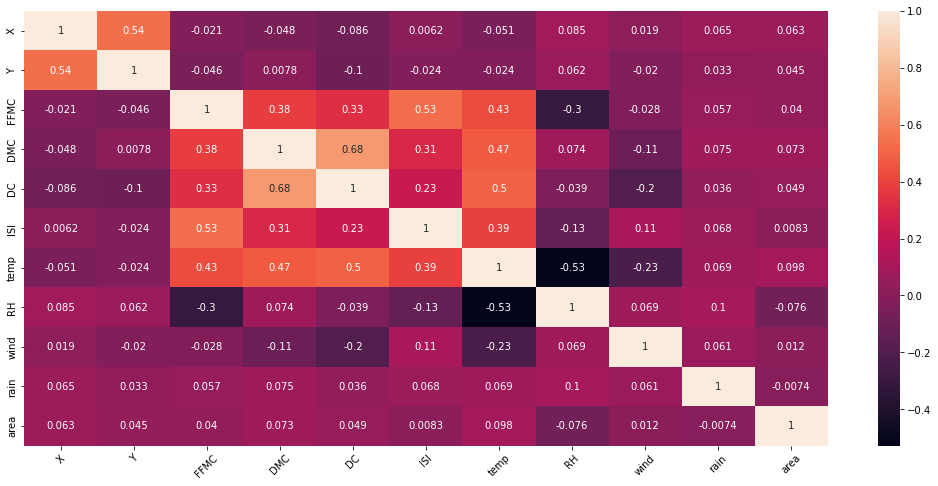

In [ ]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

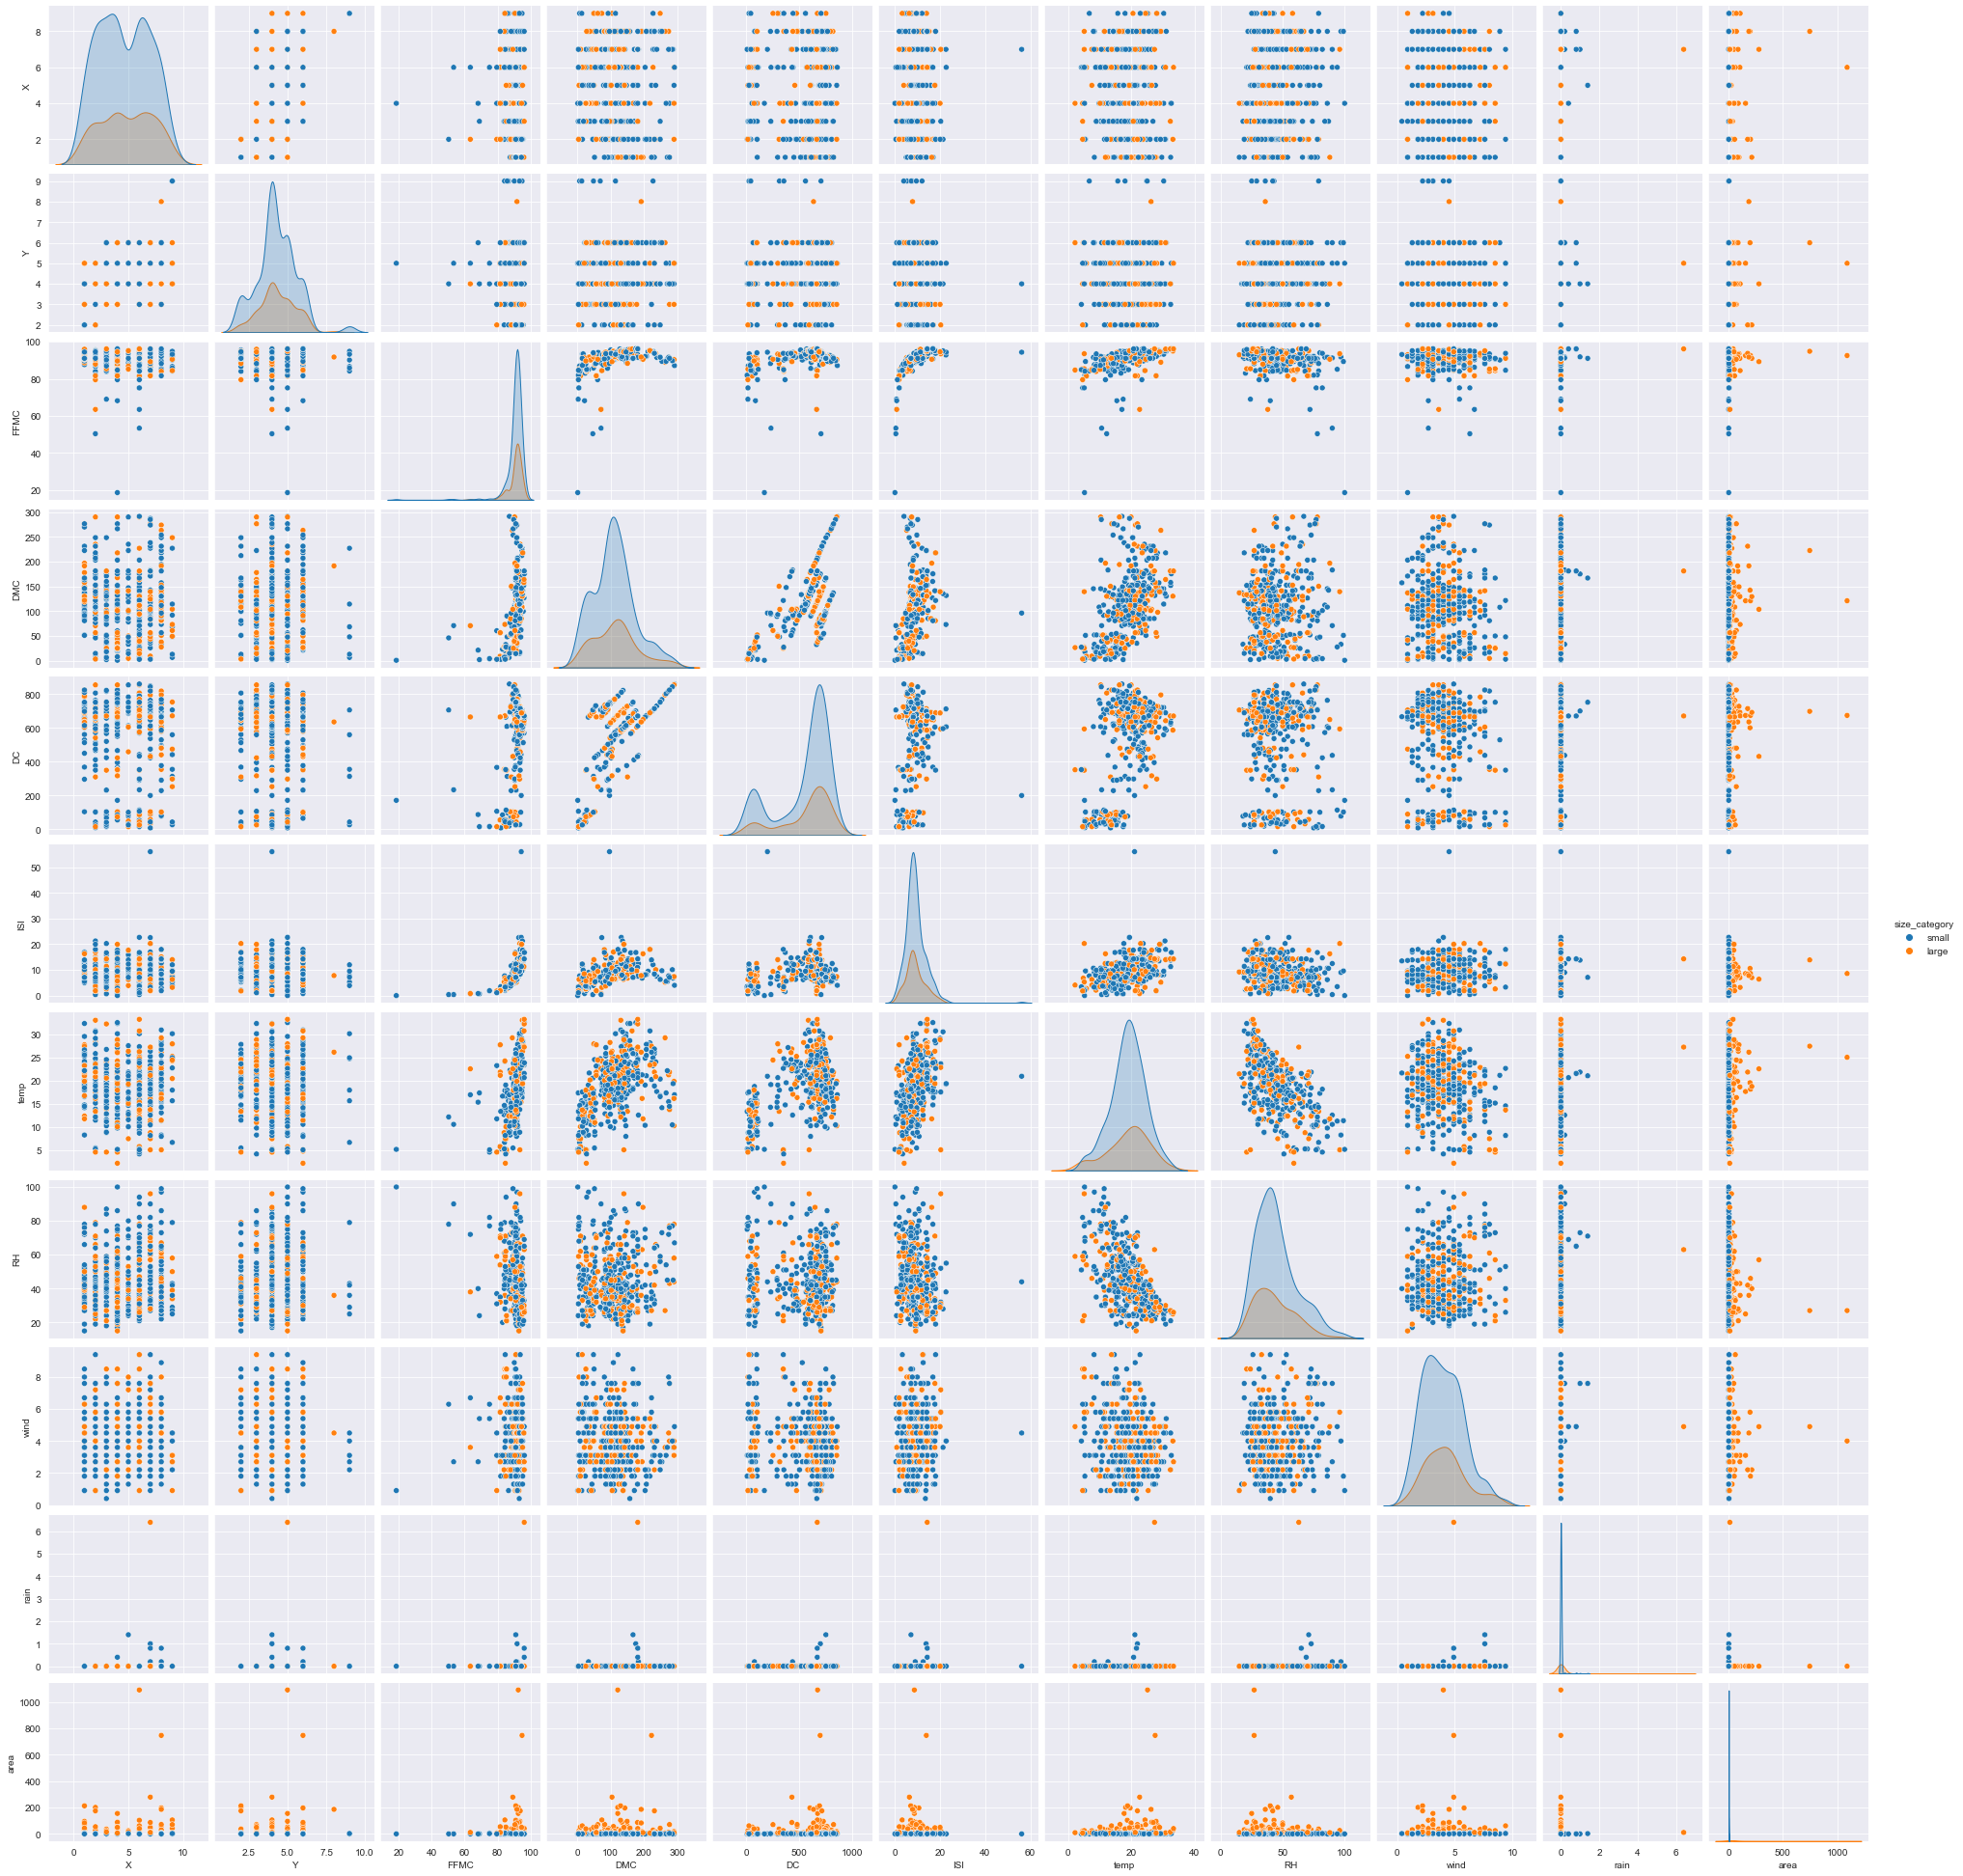

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(raw_data, hue='size_category')
plt.show()

+ #####  Univariate plots

Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

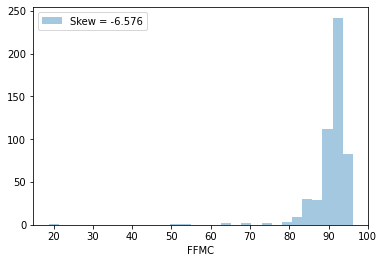

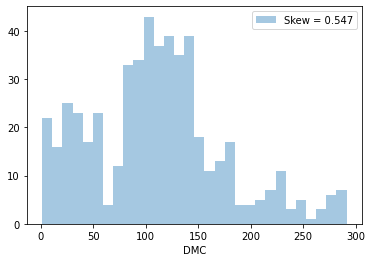

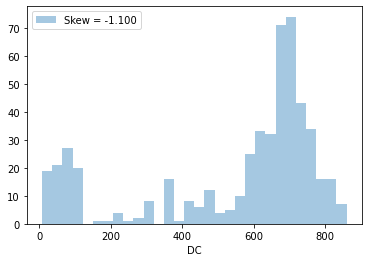

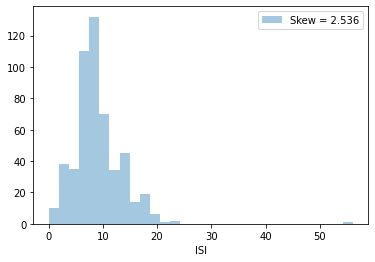

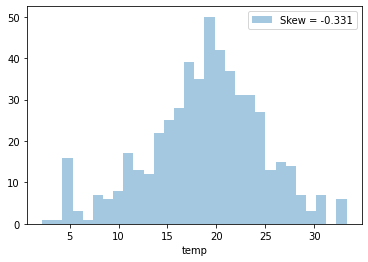

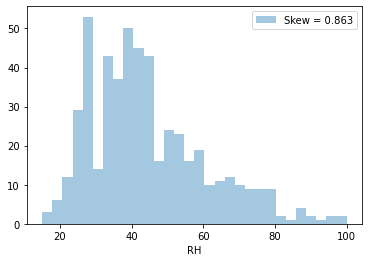

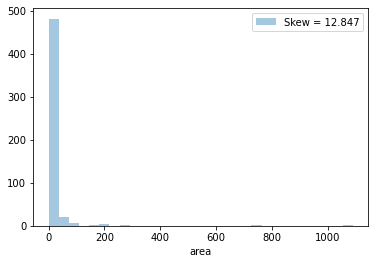

In [ ]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(raw_data[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


##### Aha! there exists some 3 observations with multiple outliers. These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.

Let's examine the boxplots for the several distributions

In [ ]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

[Table of Contents](#0.1)

### 3.1 Outliers Detection<a class="anchor" id="3.1"></a>

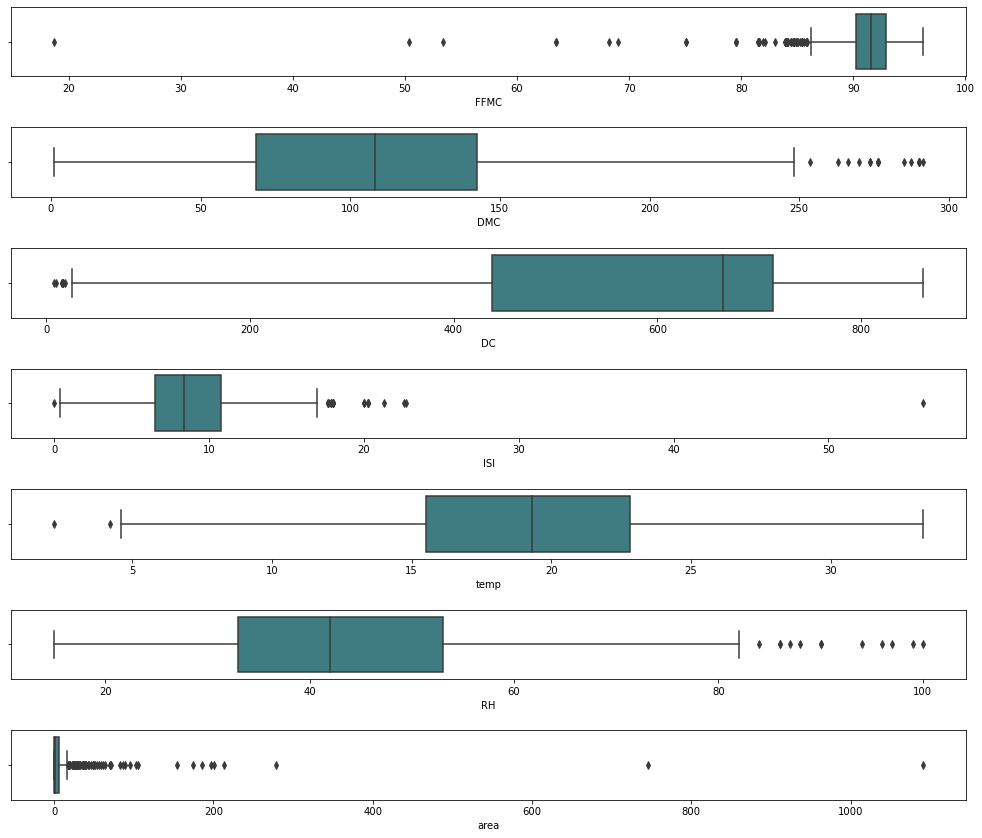

In [ ]:
ot=raw_data.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

#### After Log-Transformation

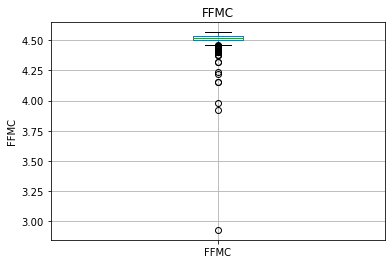

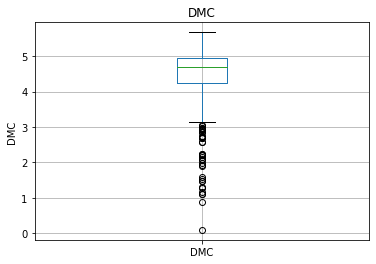

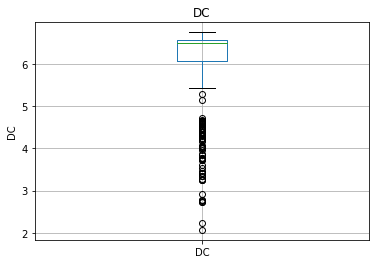

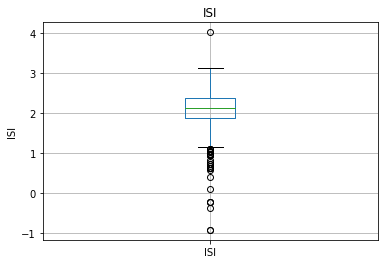

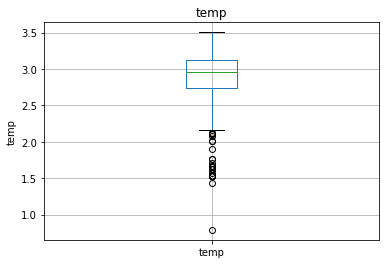

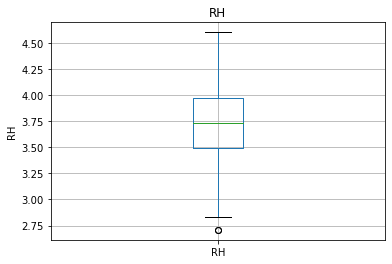

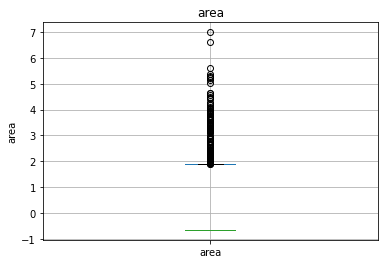

In [ ]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

[Table of Contents](#0.1)

### 3.2 Visualize the distribution of 'Area' and taking insights<a class="anchor" id="3.2"></a>

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


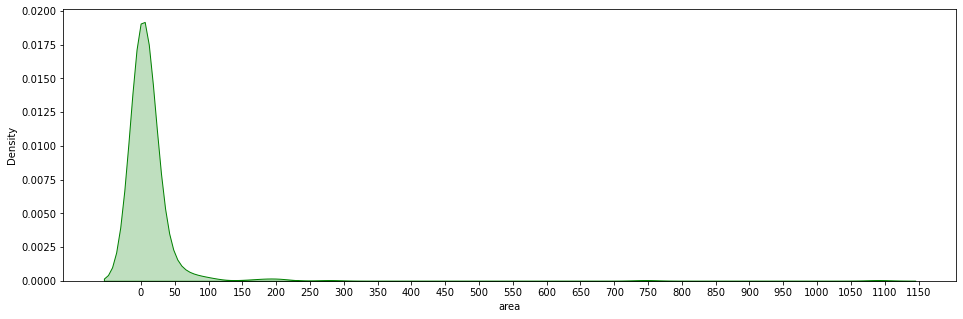

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(raw_data['area'].skew()))
print("Kurtosis: {}".format(raw_data['area'].kurtosis()))
ax = sns.kdeplot(raw_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

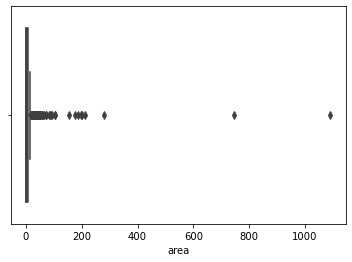

In [ ]:
ax = sns.boxplot(raw_data['area'])

#### Few observations:

+ The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

+ It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

+ We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

+ Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

[Table of Contents](#0.1)

### 3.3 Categorical Variables<a class="anchor" id="3.3"></a>

In [ ]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


month  day size_category
0   mar  fri         small
1   oct  tue         small
2   oct  sat         small
3   mar  fri         small
4   mar  sun         small

In [ ]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [ ]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



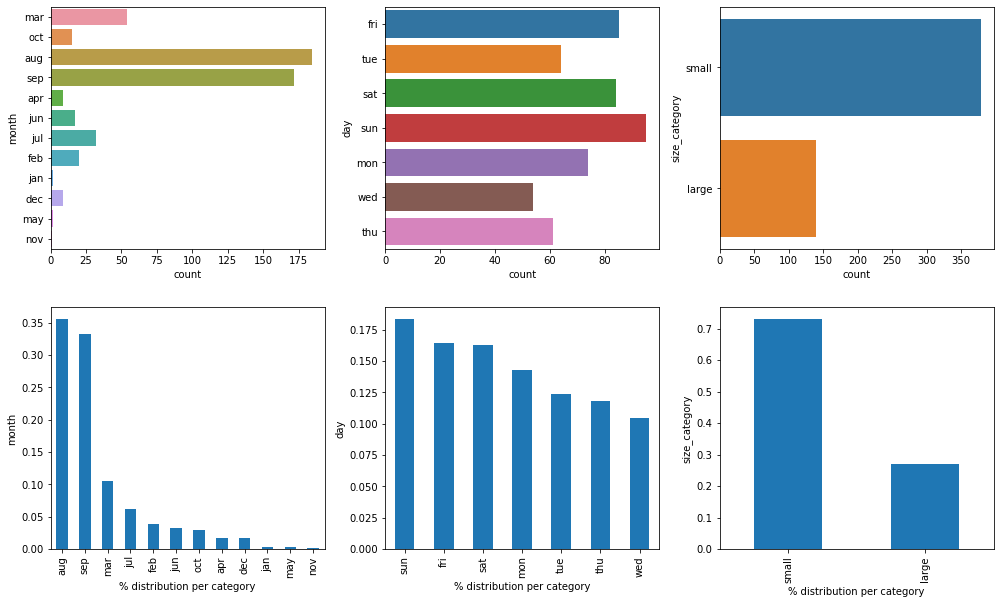

In [ ]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=raw_data,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

1. It is interesting to see that abnormally high number of the forest fires occur in the month of **`August`** and **`September`**.

2. In the case of day, the days from **`Friday`** to **`Monday`** have higher equal proportion of cases. (However, no strong indicators)May be because of the weekend animal throw some kind of cool party and

#### Analyzing the relationship of categorical features with respect to the Target feature

#### Bivariate Analysis

[Table of Contents](#0.1)

### 3.4 Bivariate Analysis for all variables in the dataset<a class="anchor" id="3.4"></a>

In [ ]:
print(raw_data['area'].describe(),'\n')
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category damage_category  
0         small       No damage  
1         small       No damage  
2         small       No damage  
3         small       No damage  
4         small       No damage

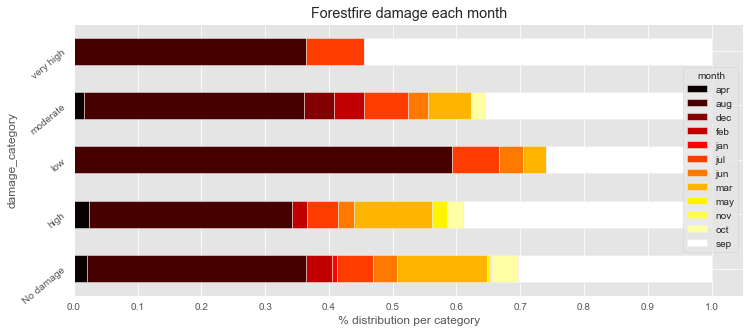

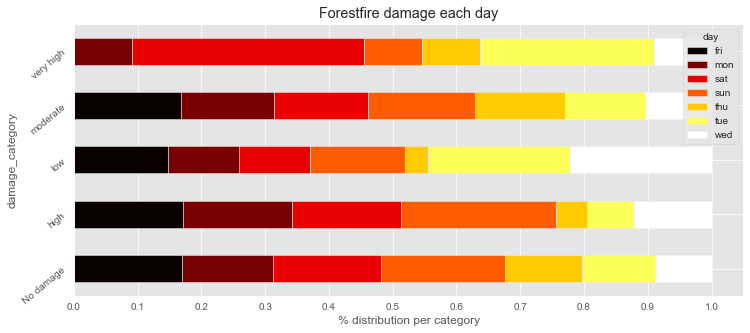

In [ ]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))

plt.show()

+ Previously we had observed that **`August`** and **`September`** had the most number of forest fires. And from the above plot of month, we can understand few things

+ Most of the fires in August were low (< 1 hectare).
+ The very high damages(>100 hectares) happened in only 3 months - august,jan and september.
+ Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

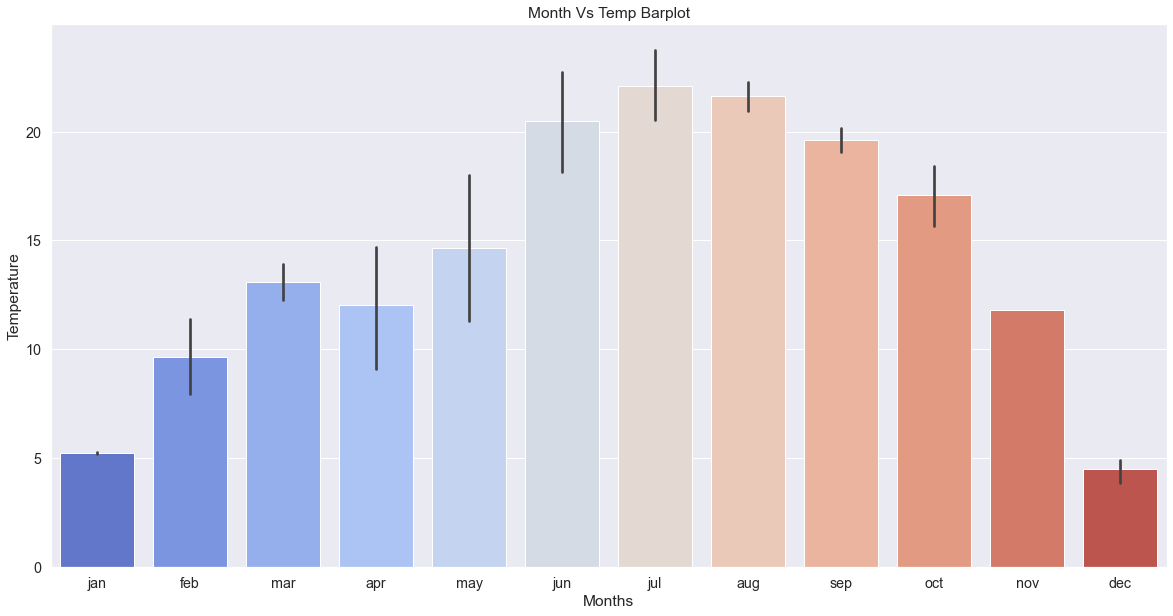

In [ ]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = raw_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='X', ylabel='Y'>

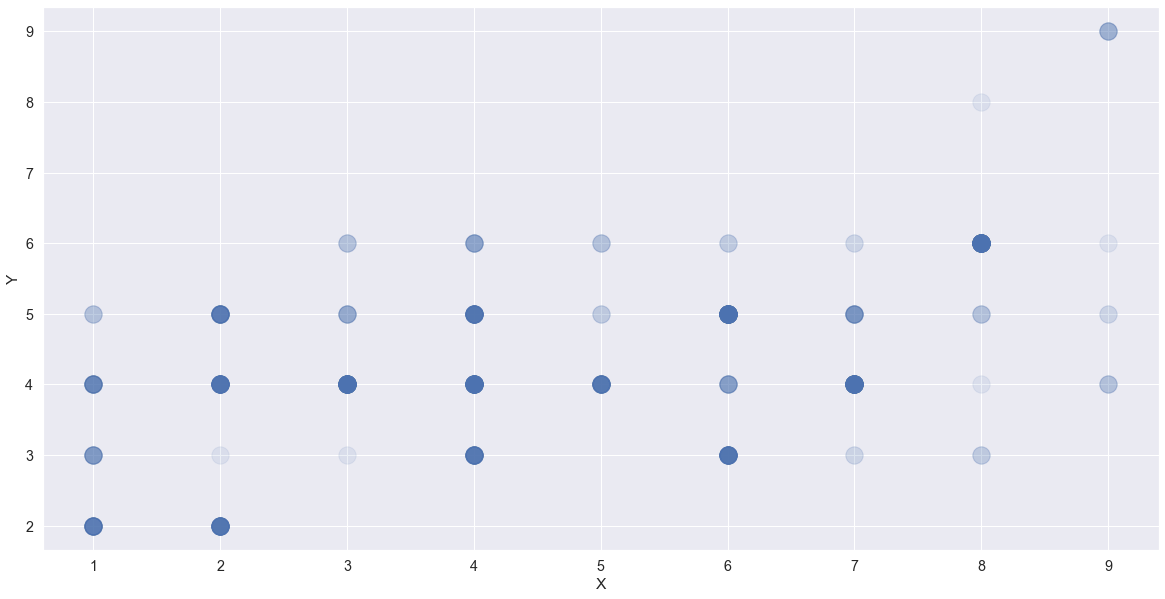

In [ ]:
raw_data.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Burnt area in different regions of the park')

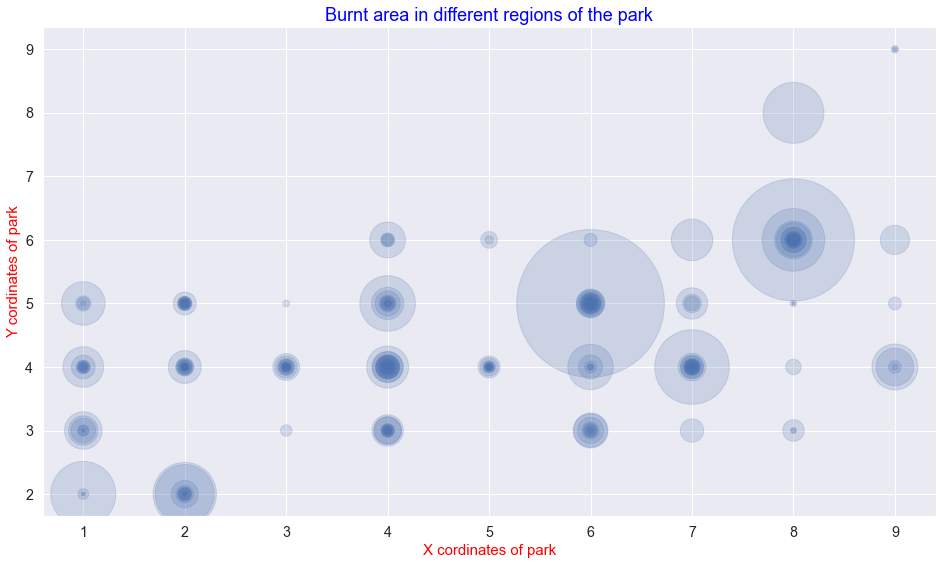

In [ ]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
raw_data.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*raw_data['area'],figsize=(16,9))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

#### Observations:

**From the above scatter plot of 9X9 representation of park we can see that there are multiple hotspots for burnt area.**

+ The cordinates (6,5) show intense burnt area.

+ By applying maximum and minimum function on area columns.

. we can deduce the min burned area is at (1,2) cordinates whereas \
. max burned area is at (9,9) cordinates

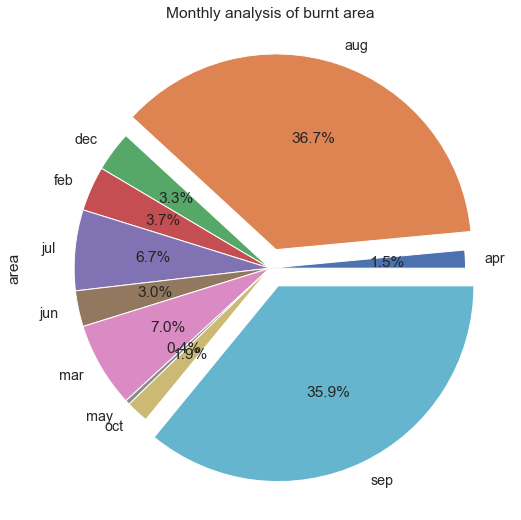

In [ ]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

### Observations:

+ As we can see from the above pie chart,the month of aug and sep have recorded highest % of forest fire i.e 36.8% & 36.1% respectively.

+ Month that recorded least forest fire is may with 0.4%.

[Table of Contents](#0.1)

### 3.5 Visualize the Large Forest Fire Size rate by month<a class="anchor" id="3.5"></a>

In [ ]:
df1=raw_data.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

% Small Forest Fire  % Large Forest Fire
January             100.000000             0.000000
February             70.000000            30.000000
March                77.777778            22.222222
April                77.777778            22.222222
May                  50.000000            50.000000
June                 82.352941            17.647059
July                 71.875000            28.125000
August               76.630435            23.369565
September            70.348837            29.651163
October              73.333333            26.666667
November            100.000000             0.000000
December             11.111111            88.888889

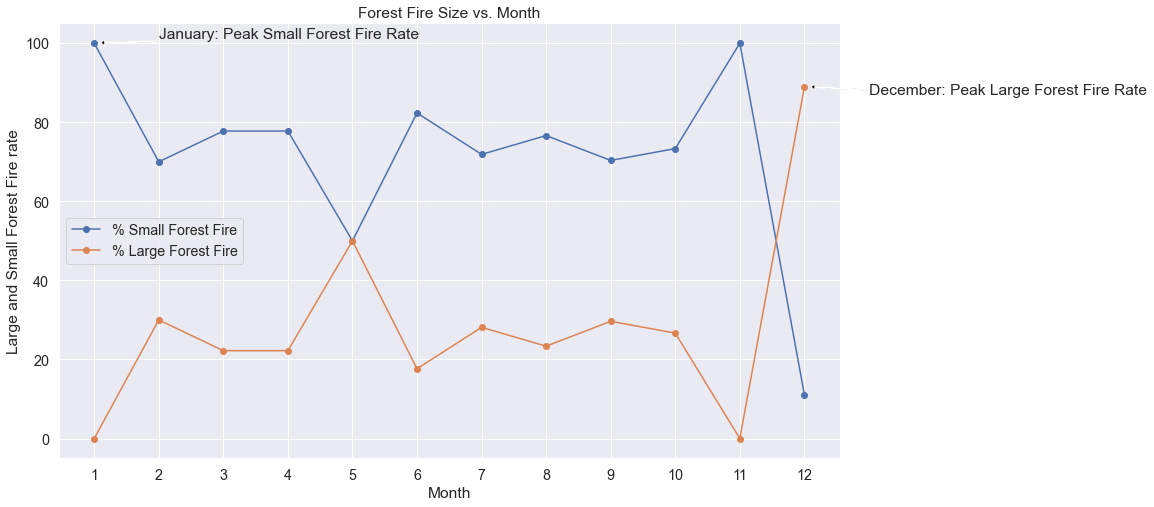

In [ ]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=raw_data.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [ ]:
data_ = raw_data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...          0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   
2          1          0        0        0        1        0        0        0   
3          0          0        1        0        0        0        0        0   
4          0          0        0        0        0        1        0        0   

   day_wed  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 29 columns]

Text(0.5, 1.0, 'Correlation with Forest Fire Size Category \n')

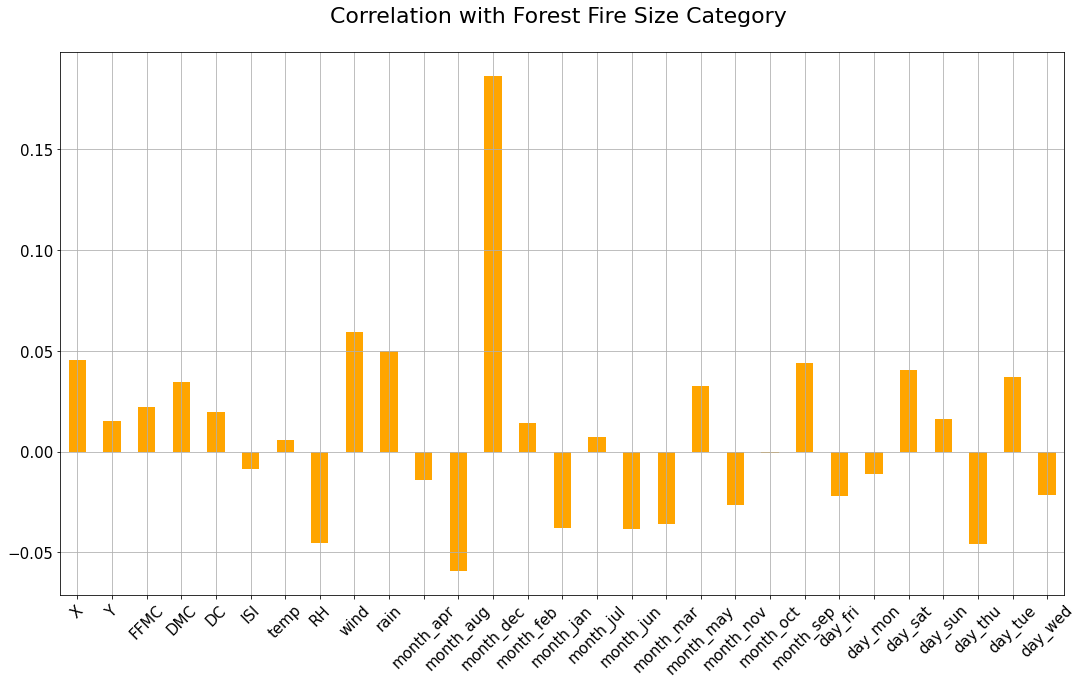

In [ ]:
df=raw_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = data_.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

### 3.6 Analysis of the response column<a class="anchor" id="3.6"></a>
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'size_category' column and compare its values to other columns.
First of all we should look at the category 'small' and 'large' in the Dependent column 'size-category'.

In [ ]:
raw_data.size_category.unique()

array(['small', 'large'], dtype=object)

#### Checking for Imbalanced or balanced dataset with regards to the Target

In [ ]:
countsizesmall = len(raw_data[raw_data.size_category == 'small'])
countsizelarge = len(raw_data[raw_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(raw_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(raw_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “small” is called the majority class, and the much smaller in size “large” class is called the minority class.

In [ ]:
raw_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

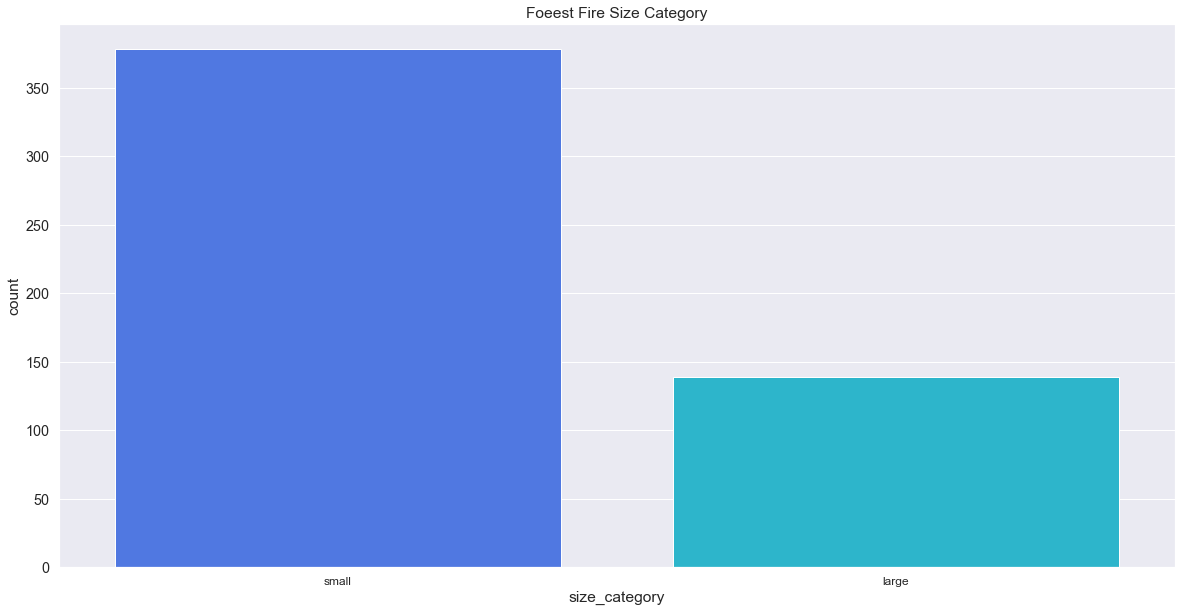

In [ ]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=raw_data, palette = pal,
              order=raw_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

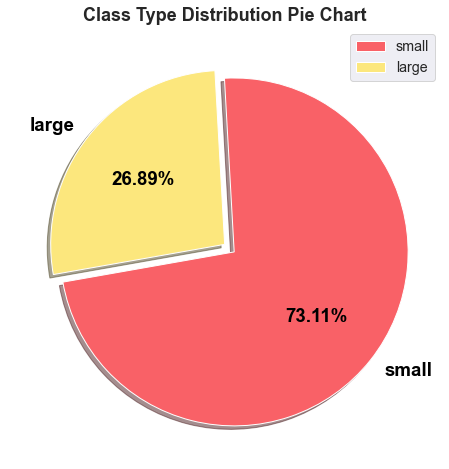

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['size_category'].value_counts(),
       labels=raw_data.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

#### [Table of Content](#0.1)

## 4. Clean the dataset <a class="anchor" id="4"></a>
#### Deal with missing data
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

![FilterMethods](https://www.geeksforgeeks.org/wp-content/uploads/ml.png)

### 4.1. Data Pre-Processing<a class="anchor" id="4.1"></a>

In [ ]:
raw_data.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

In [ ]:
df = raw_data.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...          0   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0          0          0        1        0        0        0        0        0   
1          1          0        0        0        0        0        0        1   
2          1          0        0        0        1        0        0        0   
3          0          0        1        0        0        0        0        0   
4          0          0        0        0        0        1        0        0   

   day_wed  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 30 columns]

### 4.2. Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing<a class="anchor" id="4.2"></a>

In [ ]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'

In [ ]:
df['size_category'] = raw_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_oct  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...          1   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...          1   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...          0   

   month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  day_wed  \
0          0        1        0        0        0        0        0        0   
1          0        0        0        0        0        0        1        0   
2          0        0        0        1        0        0        0        0   
3          0        1        0        0        0        0        0        0   
4          0        0        0        0        1        0        0        0   

   size_category  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 31 columns]

In [ ]:
df.size_category.unique()

array([0, 1])

#### [Table of Content](#0.1)

## 5. Test Train Split With Imbalanced Dataset<a class="anchor" id="5"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)



In [ ]:
x = df.drop('size_category',axis=1)
y = df['size_category']

In [ ]:
y.unique()

array([0, 1])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 264, 1: 97}) Testing Data Counter({0: 114, 1: 42})


In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (361, 30)
Shape of X_test:  (156, 30)
Shape of y_train:  (361,)
Shape of y_test (156,)


## 6. ***About Stratify*** :<a class="anchor" id="6"></a>
+ Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In machine learning, When we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model.
The train_test_split() splits the dataset into training_test and test_set by random sampling. But stratified sampling is performed.

What are random sampling and Stratified sampling?
Suppose you want to take a survey and decided to call 1000 people from a particular state, If you pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling.
But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

Why random sampling is not preferred in machine learning?
Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

Random sampling:
If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

Stratified Sampling:
In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

What is the solution to mentioned problems?
The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling.
The solution for both the first and second problems is to use Stratified K-Fold Cross-Validation.

What is Stratified K-Fold Cross Validation?
Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

[Table of Contents](#0.1)

### 6.1 Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset<a class="anchor" id="6.1"></a>

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 6.2 Run SVM with default hyperparameters<a class="anchor" id="6.2"></a>

In [ ]:
rf_clf = SVC()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 75.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.747875   1.000000  0.753463    0.873938      0.815621
recall       1.000000   0.082474  0.753463    0.541237      0.753463
f1-score     0.855754   0.152381  0.753463    0.504067      0.666759
support    264.000000  97.000000  0.753463  361.000000    361.000000
_______________________________________________
Confusion Matrix: 
 [[264   0]
 [ 89   8]]

Test Result:
Accuracy Score: 75.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.745098   1.000000      0.75    0.872549      0.813725
recall       1.000000   0.071429      0.75    0.535714      0.750000
f1-score     0.853933   0.133333      0.75    0.493633      0.659925
support    114.000000  42.000000      0.75  156.000000    156.000000
___

#### Observation:
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.
+ #### As Support Vector Classifier is not scoring better result we are going to use different hyperparameter tuning to improve our scores for final model building

[Table of Contents](#0.1)

## 7. Handling imbalance data using SMOTE based techniques<a class="anchor" id="7"></a>

#### Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

+ ##### <b>SMOTE: Synthetic Minority Oversampling Technique</b>
+ SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

+ <b>Working Procedure</b>:
At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:
![image.png](attachment:image.png)


Though this algorithm is quite useful, it has few drawbacks associated with it.

+ i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

+ ii) SMOTE tends to create a large no. of noisy data points in feature space.

In [ ]:
x = df.drop(['size_category'], axis=1)
y = df['size_category']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (361, 30)
Shape of X_test:  (156, 30)
Shape of y_train:  (361,)
Shape of y_test (156,)


### 7.1 SMOTE Oversampling technique<a class="anchor" id="7.1"></a>

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 264, 1: 264})


### 7.2 ADASYN: Adaptive Synthetic Sampling Approach<a class="anchor" id="7.2"></a>
ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.

<b>Working Procedure</b>:
From the dataset, the total no. of majority N– and minority N+ are captured respectively. Then we preset the threshold value, dth for the maximum degree of class imbalance. Total no. of synthetic samples to be generated, G = (N– – N+) x β. Here, β = (N+/ N–).\
For every minority sample xi, KNN’s are obtained using Euclidean distance, and ratio ri is calculated as Δi/k and further normalized as rx <= ri / ∑ rᵢ .\
Thereafter, the total synthetic samples for each xi will be, gi = rx x G. Now we iterate from 1 to gi to generate samples the same way as we did in SMOTE.\
The below-given diagram represents the above procedure:

![image.png](attachment:image.png)

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 264, 1: 257})


### 7.3 Hybridization: SMOTE + Tomek Links<a class="anchor" id="7.3"></a>
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

[Table of Contents](#0.1)

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 256, 1: 256})


### 7.4 Hybridization: SMOTE + ENN<a class="anchor" id="7.4"></a>
SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

<b>Python Code for SMOTE + ENN algorithm:

In [ ]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({1: 206, 0: 180})


##### The below-given picture shows how different SMOTE based resampling techniques work out to deal with imbalanced data.

![image.png](attachment:image.png)

[Table of Contents](#0.1)

### 7.5 Performance Analysis after Resampling<a class="anchor" id="7.5"></a>

In [ ]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')


    return algo,precision,recall,f1,sampling

In [ ]:
model_params = {

    'SVC' : {
        'model' : SVC(probability=True),
        'params' :[ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
                  ]
    }
}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='f1_weighted', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SVC with ACTUAL
Confusion Matrix
[[113   1]
 [  2  40]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       114
           1       0.98      0.95      0.96        42

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.98       156
weighted avg       0.98      0.98      0.98       156
 

AUC-ROC
0.9987468671679198
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SVC with SMOTE
Confusion Matrix
[[113   1]
 [  4  38]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       0.97      0.90      0.94        42

    accuracy                           0.97       156
   macro avg       0.97      0.95      0.96       156
weighted avg       0.97      0.97      0.97       156
 

AUC-ROC
0.9966583124477861
xxxxxxx

#### As the results can be compared, the Hybridization technique using SMOTE_Tomek gave the best results we are going to use it further i.e the AUC score

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 256, 1: 256})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=1, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 256, 1: 256})
After Counter({0: 179, 1: 179})
Shape of X_train:  (358, 30)
Shape of X_test:  (154, 30)
Shape of y_train:  (358,)
Shape of y_test (154,)


[Table of Contents](#0.1)

### 8. Machine Learning: Classification <a class="anchor" id="8"></a>

![FilterMethods](http://algolytics.com/wp-content/uploads/2018/08/Classification_model_construction.png)

### **Kernel trick** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows-


### Kernel function

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

In the context of SVMs, there are 4 popular kernels –
`Linear kernel`,\
`Polynomial kernel`,\
`Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and \
`Sigmoid kernel`. These are described below -

[Table of Contents](#0.1)

### 8.1 Sklearn Support Vector Classifier Using Linear Kernel<a class="anchor" id="8.1"></a>

#### **Linear kernel**

In linear kernel, the kernel function takes the form of a linear function as follows-

**linear kernel : K(xi , xj ) = xiT xj**

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure.

#### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

In [ ]:
# initiating the model
model = SVC(kernel='linear', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.9935


### Classification Report

In [ ]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.99      1.00      0.99        77

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



Classification report shows the precision, recall, F1 and support scores for the Logistic Regression classification model.

+ Precision of 0 represents that for all instances predicted as small size fire, the percentage of fire that actually small is 100%.


+ Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all fire that is actually small, the model predicts 99% correctly that there would be small fire.

In general, the report shows that <b>SVC model using Linear Kernel has great predictive power to identify the fire size that would be either small or large int the Forest</b>.

### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

#### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 100.00%
Test set score: 99.35%


##### The training-set accuracy score is 100% while the test-set accuracy to be 99.35%. These two values are quite comparable. So, there is no sign of overfitting.

### Confusion matrix
Table that describes the performance of a classification model

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

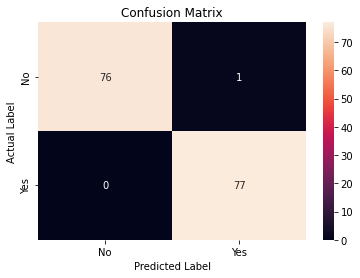

In [ ]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### ROC - AUC
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

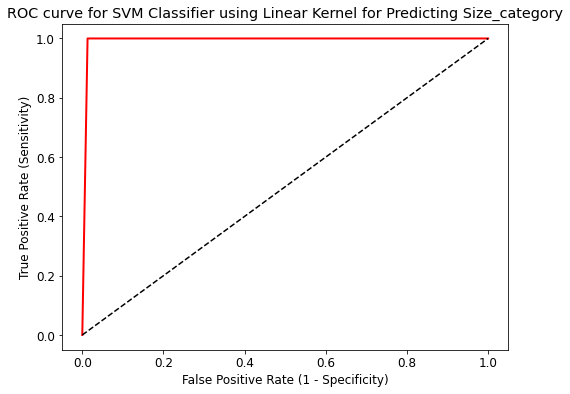

ROC AUC : 0.9935


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

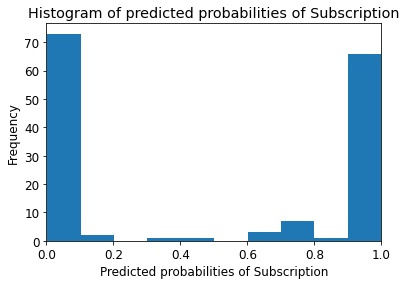

In [ ]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

#### Observations
+ The first column tell us that there are approximately 73 observations with probability between 0.0 and 0.1 that the size of the fire will be small.
+ There are almost equal amount number of observations for probability greater than and less than 0.5.
+ Majority of observations predict that the Forest Fire size will be small.

### ROC AUC Score
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [ ]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.9935064935064934


<b>Comments
+ ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

+ ROC AUC of our model approaches towards 0.5. So, we can conclude that our classifier doesn't do a good job in predicting whether it will or small or large size of fire.

[Table of Contents](#0.1)

### 8.2 Sklearn Support Vector Classifier Using Polynomial Kernel<a class="anchor" id="8.2"></a>

#### **Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

#### Polynomial Kernel

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

In [ ]:
# initiating the model
model = SVC(kernel='poly', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.6818


In [ ]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        77
           1       1.00      0.36      0.53        77

    accuracy                           0.68       154
   macro avg       0.81      0.68      0.65       154
weighted avg       0.81      0.68      0.65       154



#### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 67.32%
Test set score: 68.18%


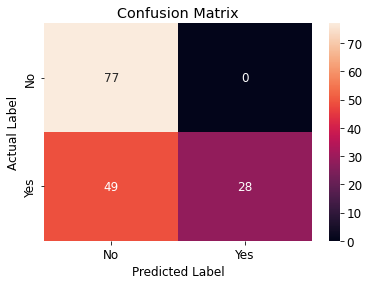

In [ ]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

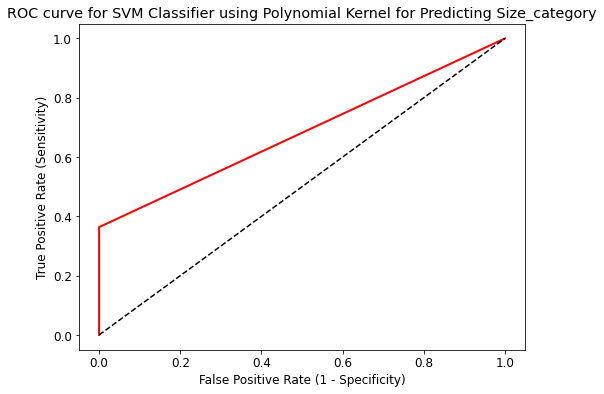

ROC AUC : 0.6818


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

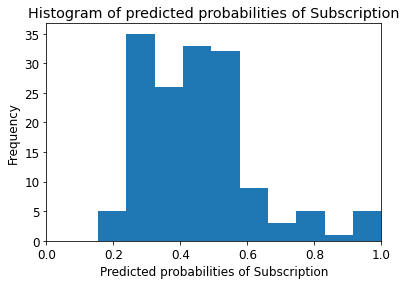

In [ ]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [ ]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.6818181818181819


[Table of Contents](#0.1)

### 8.3 Sklearn Support Vector Classifier Using RBF Kernel<a class="anchor" id="8.3"></a>

#### **Radial Basis Function Kernel**

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –


#### Radial Basis Function kernel

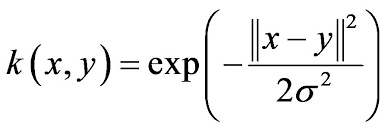

The following diagram demonstrates the SVM classification with rbf kernel.

#### SVM Classification with rbf kernel

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

In [ ]:
# initiating the model
model = SVC(kernel='rbf', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(probability=True)

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.5584


In [ ]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.54      0.83      0.65        77
           1       0.63      0.29      0.39        77

    accuracy                           0.56       154
   macro avg       0.58      0.56      0.52       154
weighted avg       0.58      0.56      0.52       154



#### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 61.17%
Test set score: 55.84%


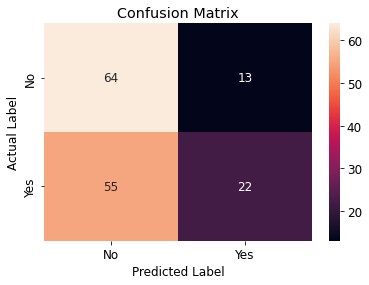

In [ ]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

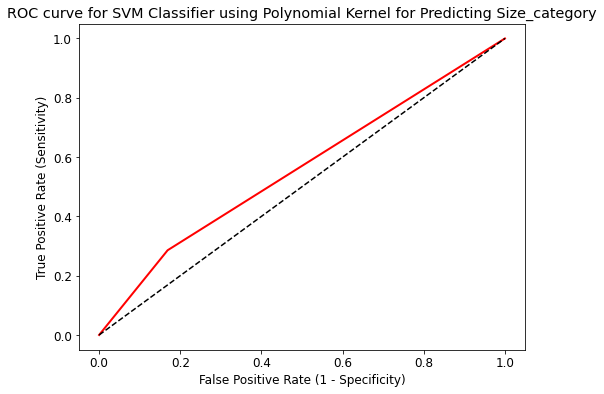

ROC AUC : 0.5584


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

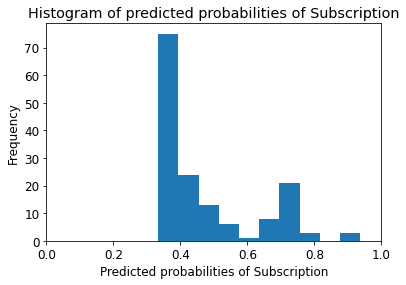

In [ ]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [ ]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.5584415584415584


#### [Table of Contents](#0.1)

### 8.4 Sklearn Support Vector Classifier Using Sigmoid kernel<a class="anchor" id="8.4"></a>

### **Sigmoid kernel**

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

**sigmoid kernel : k (x, y) = tanh(αxTy + c)**

Sigmoid kernel can be visualized with the following diagram-

### Sigmoid kernel

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

In [ ]:
# initiating the model
model = SVC(kernel='sigmoid', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.5065


In [ ]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.51      0.42      0.46        77
           1       0.51      0.60      0.55        77

    accuracy                           0.51       154
   macro avg       0.51      0.51      0.50       154
weighted avg       0.51      0.51      0.50       154



#### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 53.35%
Test set score: 50.65%


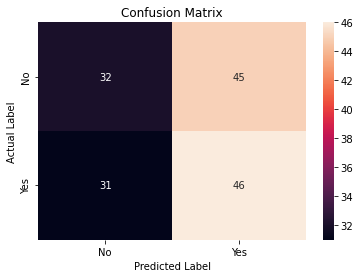

In [ ]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

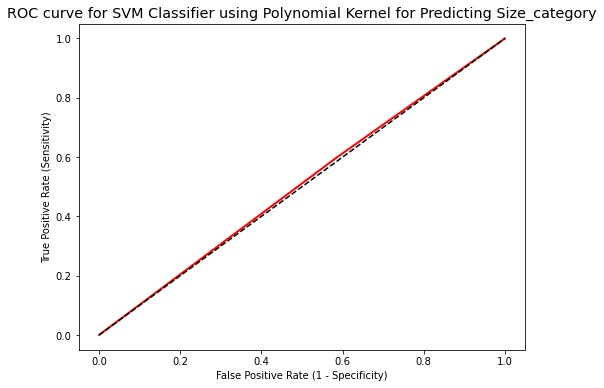

ROC AUC : 0.5065


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

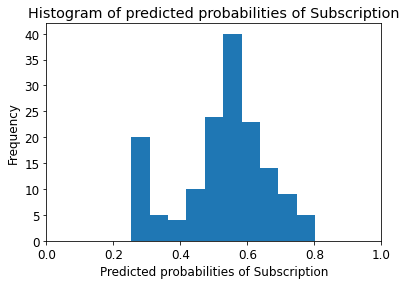

In [ ]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [ ]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.5064935064935064


## 9. Hyperparameter Tuning to improve Accuracy<a class="anchor" id="9"></a>

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
The images below (same as image 1 and image 2 in section 2) are example of two different regularization parameter. Left one has some misclassification due to lower regularization value. Higher value leads to results like right one.\
low regularization value
![image.png](attachment:image.png)
high regularization value
![image-2.png](attachment:image-2.png)

**Gamma**
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.
![image-3.png](attachment:image-3.png)
![image-4.png](attachment:image-4.png)

### Handle outliers with SVMs


There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The message is that since the dataset contains outliers, so the value of C should be high while training the model.

In [ ]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(x_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.986031746031746

In [ ]:
gsSVMC.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'poly', 'tol': 0.001}

In [ ]:
predict_results = svm_best.predict(x_test)
np.mean(predict_results==y_test)

0.974025974025974

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9888


Parameters that give the best results : 

 {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1, degree=2, gamma=0.01, kernel='poly')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.9870


#### Comments
+ Our original model test accuracy is 75%2 while GridSearch CV score on test-set is 98.88%.
- So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.


- Here, we should not confuse `best_score_` attribute of `grid_search` with the `score` method on the test-set.


- The `score` method on the test-set gives the generalization performance of the model. Using the `score` method, we employ a model trained on the whole training set.


- The `best_score_` attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.

# 10. **Conclusion, Pro's and Con's** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)



1. We have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, exploring different `Smote Ovesmapling techniques` that provides better accuracy in models.

2.	We get maximum accuracy with `linear` kernel with train accuracy is 100% and testing accuracy 99.35%. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. .

3.	ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

4.	I also used stratified k fold validation sampling technique while train test split when data was imbalance to provide equal weight for both majority and minority as they are in the dataset

5.	Our model test with linear kernel accuracy is 0.9985 while GridSearch CV score on test-set is 0.9870.

### Pros
* Effective on datasets with multiple features, like financial or medical data.
* It is really effective in the higher dimension.
* Effective when the number of features are more than training examples
* The hyperplane is affected by only the support vectors thus outliers have less impact.
* It performs well for relatively small datasets

### Cons
* If the number of features is a lot bigger than the number of data points, avoiding over-fitting when choosing kernel functions and regularization term is crucial.
* For larger dataset, it requires a large amount of time to process.
* Works best only on small sample sets because of its high training time
- Selecting, appropriately hyperparameters of the SVM that will allow for sufficient generalization performance.
- Selecting the appropriate kernel function can be tricky.